# 1. 인구 통계학적 필터링
(1000만 영화처럼 그냥 모든 관객들이 전체적으로 젤 좋아하는 영화추천)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# kaggle에서 tmdb_5000 검색해서 데이터 받아오기
df1 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스9회차I반/유튜브나도코딩_공부/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스9회차I반/유튜브나도코딩_공부/tmdb_5000_movies.csv')
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [2]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df1.shape, df2.shape

((4803, 4), (4803, 20))

In [ ]:
# 두 데이터프레임 합칠것인데 id기준으로
# 주의 df1에선 movie_id고 df2에선 id임

In [4]:
df1['title'].equals(df2['title'])
# equals이용해서 비교 True

True

In [5]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
df1.columns = ['id', 'title', 'cast', 'crew']
# title은 중복되니까 제거할것

In [8]:
# 이 데이터를 df2에 merge할 것
df1[['id', 'cast', 'crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [9]:
df2 = df2.merge(df1[['id', 'cast', 'crew']], on='id')

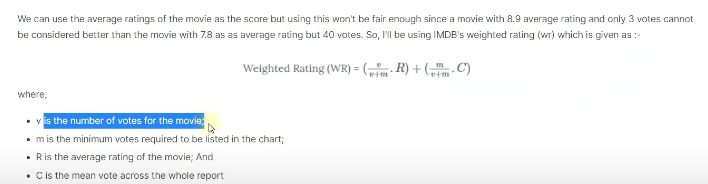

10/10 점인데 5명이 평가한영화 vs 8/10점인데 500명이 평가한 영화

- 후자가 신뢰도 더 높음. 그러므로 평점만 보지말자
- 위의 가중치 식 이용할 것⭐
- v = vote_count
- R = vote_average
- m = 차트에 오르기 위한 최소한의 투표 수
- C = 전~체 평균 평점

In [10]:
C = df2['vote_average'].mean()

In [13]:
m = df2['vote_count'].quantile(0.9) # 상위 10퍼 값 찍어줌
m

1838.4000000000015

In [12]:
# 최소 1838개 초과 투표된 영화만 활용할 것
q_movies = df2.copy().loc[df2['vote_count'] >= m]

In [14]:
def weighted_rating(x,m=m, C=C):
  v = x['vote_count']
  R = x['vote_average']
  return (v / (v+m)*R) + (m / (m+v)*C)

In [15]:
# 새로운 계산된 열 추가
q_movies['score'] = q_movies.apply(weighted_rating, axis=1) # axis=0하면 컬럼단위로 적용됨

# 끝 score기준으로 내림차순 정렬해서 영화 제목만뽑아주면 됨!

In [16]:
q_movies.sort_values(by='score', ascending=False)['title']
# 나머지 정보(다른 열) 필요하면 더뽑아주면됨

1881        The Shawshank Redemption
662                       Fight Club
65                   The Dark Knight
3232                    Pulp Fiction
96                         Inception
                    ...             
41                     Green Lantern
337           A Good Day to Die Hard
193                      After Earth
91      Independence Day: Resurgence
242                   Fantastic Four
Name: title, Length: 481, dtype: object

## 우리가 뽑은 score기준과 이미 있는 열인 popularity의 영화 결과가 다른 이유
popularity는 오늘 시청수, 좋아요누른수, 찜목록에 넣은 수처럼 다양한 요소들 따져서 계산된 것.
어제 > 오늘 급 시청수 상승이면 인기 급상승 점수처럼 플러스되는느낌? 즉, 책정기준이 아예 다르다

# 2. 컨텐츠 기반 필터링
개인기준(내 취향별 비슷한 영화 추천)

In [17]:
# 영화 줄거리
df2['overview']
# 텍스트 분석⭐⭐해서 비슷한 내용 찾을 것!

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

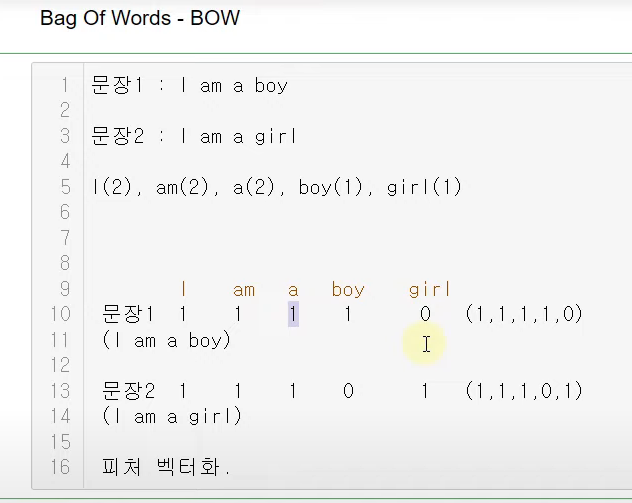

CountVectorizer
- 그냥 빈도수 자체로 센것

TfidfVectorizer
- 빈도수로 세면 관사같은 의미없는 말들이 대빵먹으므로 이런 단점 고려해준 것!
- 빈도수가 많으면 중요한 단어이지만 > 모든 문서에서 공통적으로 많이나온다? > 중요도 낮춘다.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # 아래 불용어들은 사용 안할 것

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [20]:
# null값 채우기!
df2['overview'] = df2['overview'].fillna('')

In [21]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
# shape
(4803, 20978)
# 4803개의 줄거리들이
# 20978개의 단어들로 어떻게 이루어져있는지!

(4803, 20978)

In [23]:
# cosine_similarity 보다 linear_kernel이 빠르기 때문(결과는 같음)
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

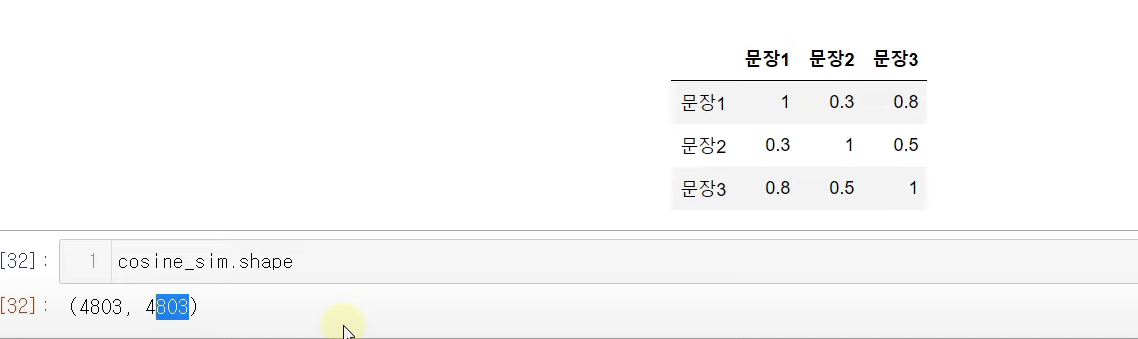

In [24]:
# 영화제목 입력하면 몇번째 인덱스인지 알려주도록
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [25]:
# 이런식으로 영화제목치면 인덱스 나오도록 사용할 것
indices['The Dark Knight Rises']

3

In [ ]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반환
def get_recommendations(title, cosine_sim=cosine_sim):
  idx = indices[title] # 영화제목입력해서 인덱스 찾고

  # (인덱스, 유사도값)
  sim_scores = list(enumerate(cosine_sim[idx]))

  # 유사도값으로 내림차순 정렬해서
  sim_scores = sorted(sim_scores, key= lambda x:x[1], reverse=True)

  # sim_scores[1:11] # 0번째는 자기자신이니까 빼고 10개 슬라이싱

  # 인덱스값들만 뽑아오기
  test_movie_indices = [s[0] for s in sim_scores[1:11]]

  # 영화제목 뽑기! 이때 사용하려고 위에 굳이 영화제목을 인덱스로 다시 만든 것
  return df2['title'].iloc[test_movie_indices]


In [26]:
cosine_sim[3]

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

# 컨텐츠(배우, 감독 등) 기반 필터링
- 위에선 줄거리 기반 overview 하나만 사용해서 추천했었다.

In [29]:
df2.loc[0, 'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

이렇게 리스트나 딕셔너리가 문자열형태로 바뀌어 버린 경우⭐

In [34]:
s1 = [{"id": 28, "name": "Action"}]
s2 = '[{"id": 28, "name": "Action"}]'

In [35]:
from ast import literal_eval
s2 = literal_eval(s2)

In [36]:
# 문자형을 다시 리스트로 돌려준다.
s2

[{'id': 28, 'name': 'Action'}]

In [37]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(literal_eval)

In [30]:
df2.loc[0,'crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [42]:
# crew행에서 director 정보만 뽑아서 따로 열 만들것
lst = []
for crew in df2['crew']:
  for i in range(len(crew)):
    if crew[i]['job'] == 'Director':
      lst.append(crew[i]['name'])

In [43]:
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']

  return np.nan

In [44]:
df2['director'] = df2['crew'].apply(get_director)

In [45]:
df2.loc[0,'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

등장인물cast에선 처음 3명의 name만 뽑자.(처음3명이 보통 주 등장인물이니까)

In [46]:
def get_list(x):
  if isinstance(x,list): # 리스트가 str형태로 되어있는지 확인
    names = [i['name'] for i in x]
    if len(names) > 3:
      names = names[:3]
    return names

  return []

In [47]:
features = ['cast', 'keywords', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(get_list)

In [50]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [51]:
# 영어 전부 소문자로 바꾸고, 한 슬기 공백 제거할 것
def clean_data(x):
  if isinstance(x,list):
    return [str.lower(i.replace(' ', '')) for i in x]

  else:
    if isinstance(x,str):
      return str.lower(x.replace(' ', ''))

    else:
      return ''

In [52]:
features = ['cast', 'keywords','director', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(clean_data)

In [53]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


이쁘게 잘 바꼈다

In [54]:
# soup이라는 새로운 컬럼 만들기
def create_soup(x):
  return " ".join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' '+ ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1) # 행방향으로 적용!⭐⭐⭐

## 이 문자열들은 하나하나가 모두 중요하기때문에 Countvectorizer 사용할 것!

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

# 4803개의 영화중 11520 단어에 대한 matrix나옴

In [56]:
# 위에선 linear_kernel썼지만 이번엔 코사인 유사도 써보자!
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [57]:
# 위에꺼 그대로 쓰면됨!
def get_recommendations(title, cosine_sim=cosine_sim):
  idx = indices[title]

  # (인덱스, 유사도값)
  sim_scores = list(enumerate(cosine_sim[idx]))

  # 유사도값으로 내림차순 정렬
  sim_scores = sorted(sim_scores, key= lambda x:x[1], reverse=True)

  # sim_scores[1:11] # 0번째는 자기자신이니까 빼고 10개 슬라이싱

  # 인덱스값들만 뽑아오기
  test_movie_indices = [s[0] for s in sim_scores[1:11]]

  # 영화제목 뽑기!
  return df2['title'].iloc[test_movie_indices]

In [60]:
get_recommendations('Avatar', cosine_sim2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

In [58]:
movies = df2[['id', 'title']].copy()
movies.head()

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


# 데이터 값들 저장해서 사용할거면 피클 이용하면 됨!

In [ ]:
pickle.dump(movies, open('movies.pickle', 'wb'))

In [ ]:
pickle.dump(cosine_sim2, open('cosin_sim.pickle', 'wb'))

pickle로 저장해서 벡터값 사용하면 됨!


# 3. 협업 필터링(사용자 리뷰 기반)
나 : up, 주토피아
다른 사람 : up, 주토피아, 인사이트 아웃

저사람이 나랑 비슷해보이니까 나에게 인사이트 아웃 추천해주는 것

- 영화 줄거리, 평점, 감독 이런거 상관 안하고 내가 본 평가 이력만 가지고 추천해 주는 것!

In [61]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163341 sha256=f0f592045e0313887e3bc1827fc2797a254c5ae31d96dc3426ceab7d1a2c205f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# SVD 특이값 분해 같은것 사용할 수 있음

SVD를 사용하면 아직 평가하지 않은 데이터에 대해서 평균 값을 이용해 결측치를 채운 후 SVD를 이용해 예상 점수를 추측할 수 있습니다. 추천 시스템에서는 이 추측한 점수 중 높은 아이템에 대해서 추천을 할 수 있습니다.

특이값 분해 예제
https://leebaro.tistory.com/entry/SVD%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0

In [62]:
ratings = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스9회차I반/유튜브나도코딩_공부/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


유저의 영화 평가 자료

유저가 이영화를 이별점으로 평가했다.

In [63]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate # 교차검증 할 것

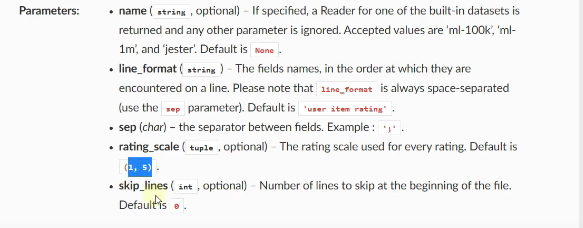

Reader에서 제공하는 점수가 1 ~ 5인데
우리가 불러온 'rating'데이터는 0.5~5라서 이것 바꿔줘야함

In [64]:
ratings['rating'].max()

5.0

In [65]:
ratings['rating'].min()

0.5

In [68]:
# 데이터를 surprise 패키지가 원하는 형태로 다시 불러올 것!
reader = Reader(rating_scale = (0.5,5)) # reader의 별점 범위를 새롭게 정의해줌
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader = reader)
# 반드시 위처럼 유저아이디, 영화아이디, 평점 3개 컬럼만 있어야함!⭐⭐⭐ 라이브러리에서 이렇게 제한해놨기 때문

In [71]:
svd = SVD(random_state=0)

In [72]:
# 교차 검증
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8881  0.8910  0.9020  0.9030  0.9023  0.8973  0.0064  
MAE (testset)     0.6844  0.6868  0.6957  0.6967  0.6907  0.6909  0.0048  
Fit time          1.77    1.50    2.22    1.92    1.53    1.79    0.27    
Test time         0.12    0.12    0.21    0.12    0.28    0.17    0.07    


{'test_rmse': array([0.88810551, 0.89101522, 0.90198237, 0.90303153, 0.90232175]),
 'test_mae': array([0.68442491, 0.68680213, 0.69572649, 0.6966958 , 0.69066091]),
 'fit_time': (1.7726364135742188,
  1.4977262020111084,
  2.2194361686706543,
  1.9219534397125244,
  1.5302269458770752),
 'test_time': (0.11707925796508789,
  0.11543607711791992,
  0.21046781539916992,
  0.1216120719909668,
  0.2797696590423584)}

In [ ]:
# 전체 데이터를 다 사용할 것
trainset = data.build_full_trainset()
# 모델 학습시키기
svd.fit(trainset)

In [75]:
# 예측해보자 유저 1에해당하는 데이터
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [77]:
svd.predict(1, 302) # 유저id, 영화id
# 1유저가 302영화를 어떻게 평가할 지 예측!
# 모델은 2.7점 정도로 예측했다.

Prediction(uid=1, iid=302, r_ui=None, est=2.722967328662646, details={'was_impossible': False})

# 맨뒤에 3은 r_ui 실제 평가한 점수 est=예측

In [78]:
svd.predict(1, 302, 3)
# 이렇게 쓰면 이사람은 302번 영화를 실제로 3점을 줬다는 의미

Prediction(uid=1, iid=302, r_ui=3, est=2.722967328662646, details={'was_impossible': False})